In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math

In [2]:
baseDir = "/home/hardyvalen/public/semester7/ta/proyekta/UserTesting"
analyticsFile = "analytics-raw.json"
formFile = "form-data.csv"

In [3]:
analyticsJSON = json.load(open(os.path.join(baseDir, analyticsFile)))

In [4]:
formFileCSV = pd.read_csv(os.path.join(baseDir, formFile))

In [5]:
analyticsIDfromJSON = [el["_id"] for el in analyticsJSON]
print(len(analyticsIDfromJSON))

79


In [6]:
analyticsIDfromForm = []

for idx, el in formFileCSV.iloc[:, 12].items():
    if isinstance(el, float):
        continue;
    tmp = el.split(",")
    for el2 in tmp:
        analyticsIDfromForm.append(el2.strip())
        
print(len(analyticsIDfromForm))

57


In [7]:
analyticsID = []
for el in analyticsIDfromJSON:
    for el2 in analyticsIDfromForm:
        if (el == el2):
            analyticsID.append(el)

print(len(analyticsID))

57


In [8]:
analytics = []
for el in analyticsID:
    for el2 in analyticsJSON:
        if (el == el2["_id"]):
            analytics.append(el2)

f = open("analytics-skimmed.json", "w")
f.write(json.dumps(analytics))
f.close()

#### Convert semua data rating yang gabisa diputer videonya dari NaN jadi 1. 

In [9]:
mos = []

for idx, row in formFileCSV.iterrows():
    if (math.isnan(row.iloc[13])):
        mos.append(int(1))
        continue
    mos.append(int(row.iloc[13]))

In [10]:
np.mean(mos)

4.433962264150943

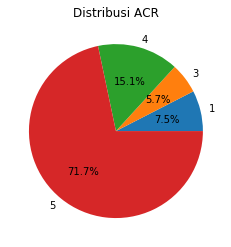

In [15]:
mosCount = np.array([0, 0, 0, 0, 0])
labels = "1", "3", "4", "5"
for el in mos:
    mosCount[el - 1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(mosCount[mosCount != 0], labels=labels, autopct='%1.1f%%')
ax1.title.set_text("Distribusi ACR")

# plt.show()
plt.savefig("figures/01-acr-pie.png")

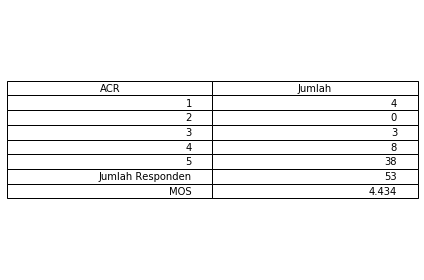

In [16]:
fig2, ax2 = plt.subplots()

fig2.patch.set_visible(False)
ax2.axis("off")
ax2.axis("tight")

# [[1, 4], [2, 0], [3, 3], [4, 8], [5, 38]]
mosCount2 = []
for idx, el in enumerate(mosCount):
    mosCount2.append([idx + 1, el])

mosCount2.append(["Jumlah Responden", 53])
mosCount2.append(["MOS", "{:.3f}".format(np.mean(mos))])
df = pd.DataFrame(mosCount2, columns=list(["ACR", "Jumlah"]))

ax2.table(cellText=df.values, colLabels=df.columns, loc='center')
fig2.tight_layout()
plt.savefig("figures/02-mos-table.png")